## <a name="eda">Loading the dataset</a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('\Dtcsv.csv')


## <a name="eda">EDA</a>

In [35]:
#Glimpsing first 5 rows
df.head()

,user_id,count_of_returns,avg_time_between_returns_to_player
0,13028346,0.0,0.0
1,13029551,2.0,4.5
2,13029660,0.0,0.0
3,13029796,1.0,0.0
4,13029821,0.0,0.0


In [36]:
X=df.iloc[:,1:]
#descriptive statistics of the dataset
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count_of_returns,33280.0,1.158774,1.536274,0.0,0.0,1.0,1.0,30.0
avg_time_between_returns_to_player,33280.0,1.021761,3.057907,0.0,0.0,0.0,0.0,30.0


Text(0.5, 0, 'Avg time / Returns')

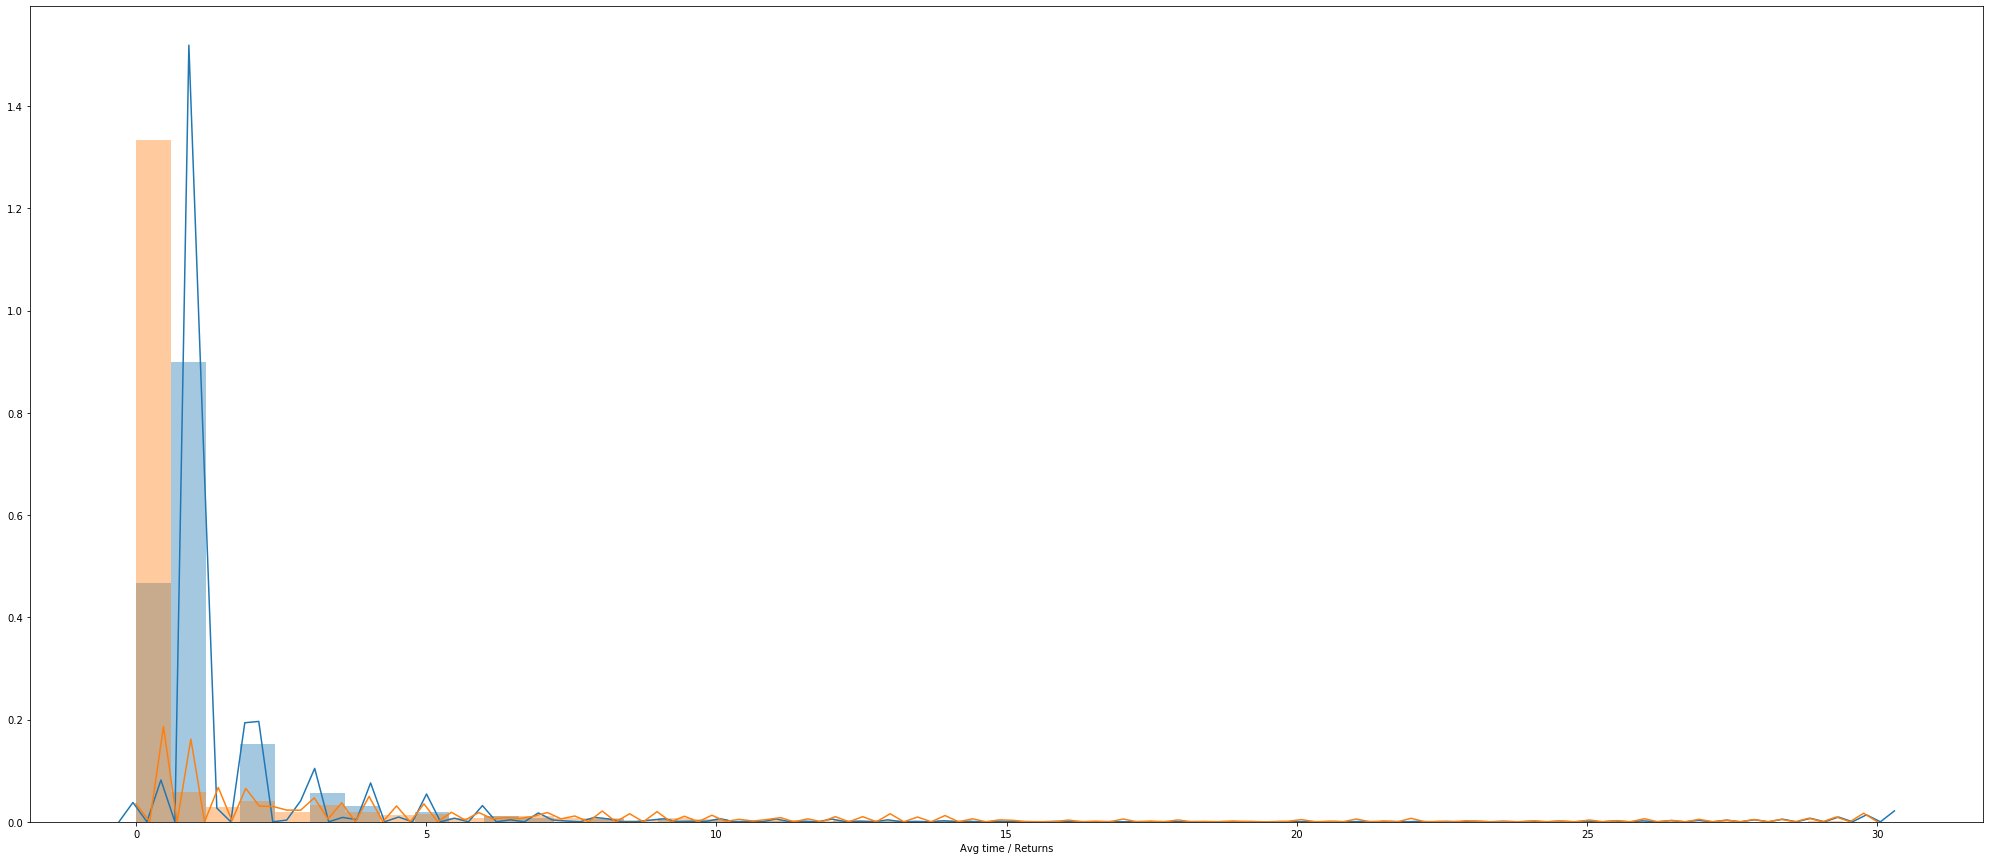

In [37]:
#Visualizing the data - displot
plt.figure(figsize=(35,15))
plot_income = sns.distplot(X["count_of_returns"])
plot_spend = sns.distplot(X["avg_time_between_returns_to_player"])
plt.xlabel('Avg time / Returns')

[(-3, 20)]

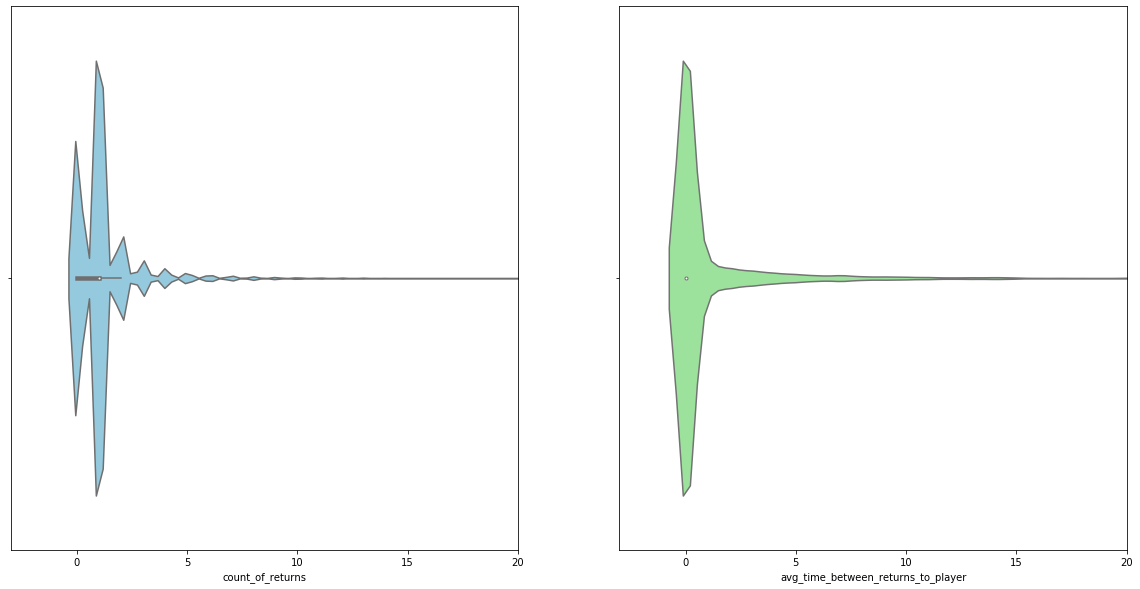

In [38]:
#Violin plot of Count of returns and Avg time
f, axes = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=True)
v1 = sns.violinplot(data=df, x='count_of_returns', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=df, x='avg_time_between_returns_to_player',color="lightgreen", ax=axes[1])
v1.set(xlim=(-3,20))

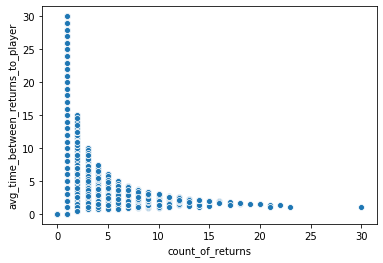

In [5]:
sns.scatterplot(df.count_of_returns, df.avg_time_between_returns_to_player)

### <a name="eda">Deciding appropriate number of clusters via the Elbow method</a>

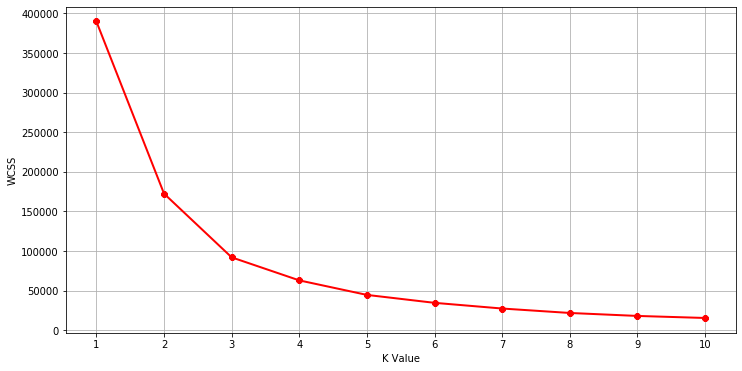

In [6]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

## <a name="eda">Clustering</a>

### <a name="kmeans">Original plot of data</a> 

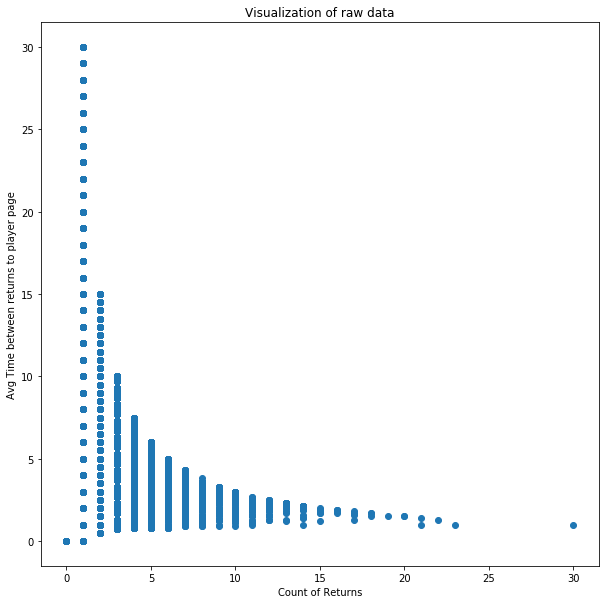

In [30]:
# Plot the data
plt.figure(figsize=(10, 10))
plt.scatter(df.iloc[:, 1], df.iloc[:, 2])
plt.xlabel('Count of Returns')
plt.ylabel('Avg Time between returns to player page')
plt.title('Visualization of raw data');
X=df.iloc[:,1:]

### <a name="kmeans">k-Means</a> 

#### <a name="kmeans">Plot with 5 clusters</a> 

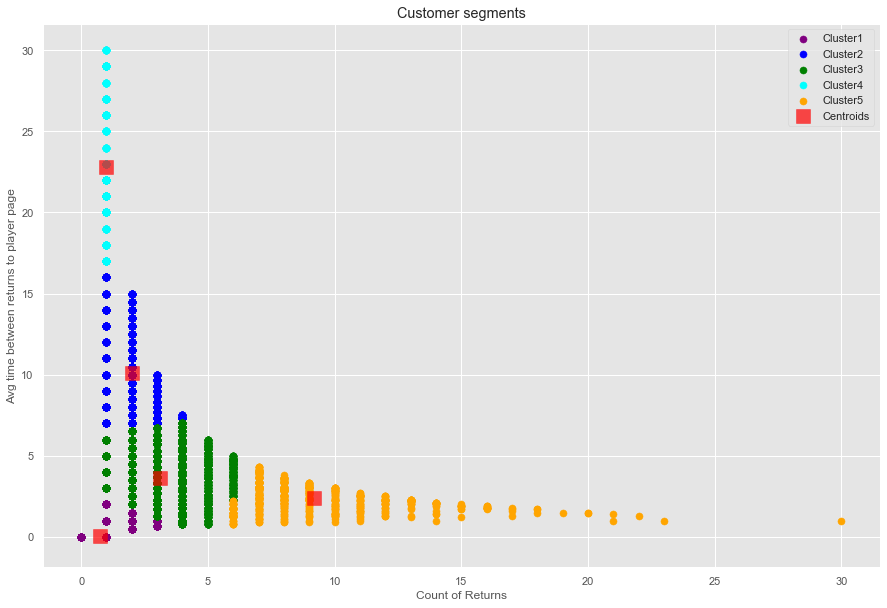

In [70]:
##Fitting kmeans to the dataset with k=5
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='orange',label='Cluster5')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Count of Returns')
plt.ylabel('Avg time between returns to player page')
plt.legend()
plt.show()

#### <a name="kmeans">Trying with 6 clusters</a> 

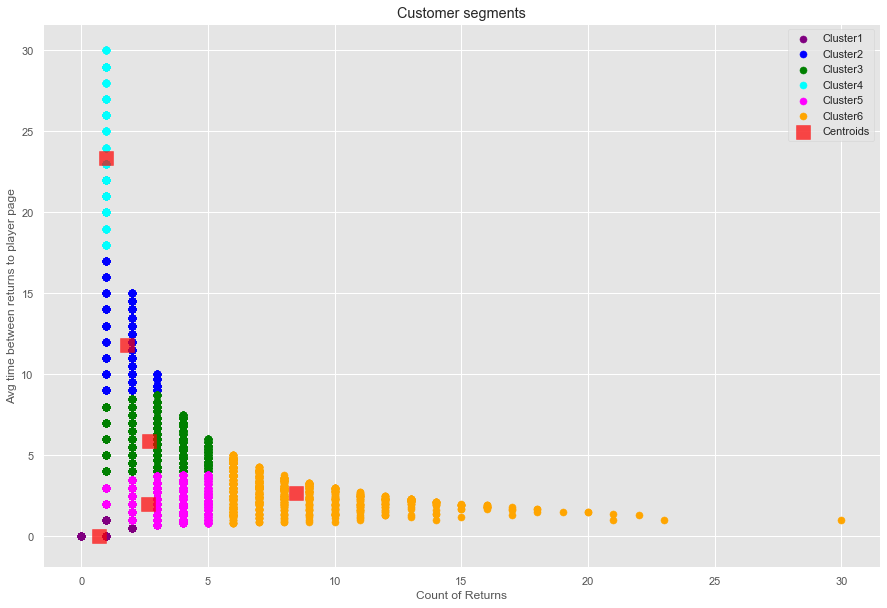

In [71]:
##Fitting kmeans to the dataset - k=6
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km6.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Count of Returns')
plt.ylabel('Avg time between returns to player page')
plt.legend()
plt.show()

## <a name="eda">Evaluation</a>

### <a name="kmeans">Silhouette score</a> 

In [29]:
kmeans = KMeans(n_clusters=5).fit(X)

# Print results
print('kmeans: {}'.format(silhouette_score(X, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.7804055199090354


#### <a name="kmeans">Silhouette score above 0.75 is generally good</a> 